# Text Analytics of The Grimm Brother's Tales
 
## Preprocessing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/grimm-tales.tab", sep="\t")
df.head()

,ATU Topic,Title,Abstract,Content,ATU Numerical,ATU Type
0,discrete,string,string,string,string,discrete
1,class,NaN,NaN,include=True,NaN,meta
2,Tales of Magic,A Tale About the Boy Who Went Forth to Learn W...,A simple boy who just wants to be frightened.,"A certain father had two sons, the elder of wh...",326.0,Supernatural Adversaries
3,Tales of Magic,Brier Rose,An offended witch curses a young princess to d...,A king and queen once upon a time reigned in a...,410.0,Supernatural or Enchanted Relatives
4,Animal Tales,Cat and Mouse in Partnership,"A mouse lives with a cat, and the cat eats all...",A certain cat had made the acquaintance of a m...,15.0,Wild Animals


In [3]:
df.shape

(56, 6)

In [3]:
### the first two rows are descriptive of the data, we have to delete them
df = df[2:len(df)]

In [4]:
df.shape

(54, 6)

In [5]:
print(df['Title'][2])
print(df['ATU Topic'][2])
print(df['Abstract'][2])

A Tale About the Boy Who Went Forth to Learn What Fear Was
Tales of Magic
A simple boy who just wants to be frightened.


In [7]:
df['Content'][2]

'A certain father had two sons, the elder of who was smart and sensible, and could do everything, but the younger was stupid and could neither learn nor understand anything, and when people saw him they said: ‘There’s a fellow who will give his father some trouble!’ When anything had to be done, it was always the elder who was forced to do it; but if his father bade him fetch anything when it was late, or in the night-time, and the way led through the churchyard, or any other dismal place, he answered: ‘Oh, no father, I’ll not go there, it makes me shudder!’ for he was afraid. Or when stories were told by the fire at night which made the flesh creep, the listeners sometimes said: ‘Oh, it makes us shudder!’ The younger sat in a corner and listened with the rest of them, and could not imagine what they could mean. ‘They are always saying: “It makes me shudder, it makes me shudder!” It does not make me shudder,’ thought he. ‘That, too, must be an art of which I understand nothing!’  Now i

In [8]:
df['ATU Topic']

2               Tales of Magic
3               Tales of Magic
4                 Animal Tales
5               Tales of Magic
6          Jokes and Anecdotes
7          Jokes and Anecdotes
8          Jokes and Anecdotes
9          Jokes and Anecdotes
10         Jokes and Anecdotes
11              Tales of Magic
12                Animal Tales
13              Tales of Magic
14             Realistic Tales
15              Tales of Magic
16              Tales of Magic
17                Animal Tales
18                Animal Tales
19              Tales of Magic
20              Tales of Magic
21              Tales of Magic
22    Tales of the Stupid Ogre
23              Tales of Magic
24             Realistic Tales
25                Animal Tales
26                Animal Tales
27                Animal Tales
28              Tales of Magic
29              Tales of Magic
30                Animal Tales
31                Animal Tales
32                Animal Tales
33              Tales of Magic
34      

In [6]:
df.groupby('ATU Topic').count()

,Title,Abstract,Content,ATU Numerical,ATU Type
ATU Topic,,,,,
Animal Tales,18,18,18,18,18
Jokes and Anecdotes,5,5,5,5,5
Realistic Tales,4,4,4,4,4
Tales of Magic,26,26,26,26,26
Tales of the Stupid Ogre,1,1,1,1,1


In [7]:
# Animal Tales
# Tales of Magic
df = df.loc[(df['ATU Topic']=='Animal Tales') | (df['ATU Topic']=='Tales of Magic')]
df.shape

(44, 6)

In [53]:
#!pip install nltk

In [8]:
import nltk

In [9]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/dsuser20/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Sentence tokenize

In [10]:
from nltk.tokenize import sent_tokenize

In [11]:
text = df['Content'].astype('str')

In [12]:
text = text.sum()

In [17]:
text

'A certain father had two sons, the elder of who was smart and sensible, and could do everything, but the younger was stupid and could neither learn nor understand anything, and when people saw him they said: ‘There’s a fellow who will give his father some trouble!’ When anything had to be done, it was always the elder who was forced to do it; but if his father bade him fetch anything when it was late, or in the night-time, and the way led through the churchyard, or any other dismal place, he answered: ‘Oh, no father, I’ll not go there, it makes me shudder!’ for he was afraid. Or when stories were told by the fire at night which made the flesh creep, the listeners sometimes said: ‘Oh, it makes us shudder!’ The younger sat in a corner and listened with the rest of them, and could not imagine what they could mean. ‘They are always saying: “It makes me shudder, it makes me shudder!” It does not make me shudder,’ thought he. ‘That, too, must be an art of which I understand nothing!’  Now i

### Sentence tokenize

In [13]:
### Return a sentence-tokenized copy of text, using NLTK's recommended sentence tokenizer 
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['A certain father had two sons, the elder of who was smart and sensible, and could do everything, but the younger was stupid and could neither learn nor understand anything, and when people saw him they said: ‘There’s a fellow who will give his father some trouble!’ When anything had to be done, it was always the elder who was forced to do it; but if his father bade him fetch anything when it was late, or in the night-time, and the way led through the churchyard, or any other dismal place, he answered: ‘Oh, no father, I’ll not go there, it makes me shudder!’ for he was afraid.', 'Or when stories were told by the fire at night which made the flesh creep, the listeners sometimes said: ‘Oh, it makes us shudder!’ The younger sat in a corner and listened with the rest of them, and could not imagine what they could mean.', '‘They are always saying: “It makes me shudder, it makes me shudder!” It does not make me shudder,’ thought he.', '‘That, too, must be an art of which I understand nothin

### Convert to Lowecase 

In [28]:
text = str.lower(text)
text[:100]

'a certain father had two sons, the elder of who was smart and sensible, and could do everything, but'

### Word tokenize

In [29]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['a', 'certain', 'father', 'had', 'two', 'sons', ',', 'the', 'elder', 'of', 'who', 'was', 'smart', 'and', 'sensible', ',', 'and', 'could', 'do', 'everything', ',', 'but', 'the', 'younger', 'was', 'stupid', 'and', 'could', 'neither', 'learn', 'nor', 'understand', 'anything', ',', 'and', 'when', 'people', 'saw', 'him', 'they', 'said', ':', '‘', 'there', '’', 's', 'a', 'fellow', 'who', 'will', 'give', 'his', 'father', 'some', 'trouble', '!', '’', 'when', 'anything', 'had', 'to', 'be', 'done', ',', 'it', 'was', 'always', 'the', 'elder', 'who', 'was', 'forced', 'to', 'do', 'it', ';', 'but', 'if', 'his', 'father', 'bade', 'him', 'fetch', 'anything', 'when', 'it', 'was', 'late', ',', 'or', 'in', 'the', 'night-time', ',', 'and', 'the', 'way', 'led', 'through', 'the', 'churchyard', ',', 'or', 'any', 'other', 'dismal', 'place', ',', 'he', 'answered', ':', '‘', 'oh', ',', 'no', 'father', ',', 'i', '’', 'll', 'not', 'go', 'there', ',', 'it', 'makes', 'me', 'shudder', '!', '’', 'for', 'he', 'was', 

### Frequency Distribution

In [30]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 4245 samples and 73835 outcomes>


In [31]:
fdist.most_common(30)

[(',', 5407),
 ('the', 4342),
 ('and', 3329),
 ('to', 1673),
 ('.', 1574),
 ('’', 1520),
 ('he', 1328),
 ('a', 1168),
 ('‘', 1159),
 ('of', 875),
 ('was', 838),
 ('it', 737),
 ('in', 721),
 ('she', 718),
 (';', 712),
 ('that', 703),
 ('her', 698),
 ('you', 683),
 ('said', 668),
 ('his', 644),
 ('i', 596),
 ('but', 547),
 ('had', 541),
 ('him', 536),
 ('they', 515),
 ('as', 451),
 ('not', 447),
 ('with', 442),
 ('for', 429),
 ('so', 427)]

### Removing Punctuation signs

In [32]:
#string.punctuation
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [33]:
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in fdist]
print(stripped[:100])

['a', 'certain', 'father', 'had', 'two', 'sons', '', 'the', 'elder', 'of', 'who', 'was', 'smart', 'and', 'sensible', 'could', 'do', 'everything', 'but', 'younger', 'stupid', 'neither', 'learn', 'nor', 'understand', 'anything', 'when', 'people', 'saw', 'him', 'they', 'said', '', '‘', 'there', '’', 's', 'fellow', 'will', 'give', 'his', 'some', 'trouble', '', 'to', 'be', 'done', 'it', 'always', 'forced', '', 'if', 'bade', 'fetch', 'late', 'or', 'in', 'nighttime', 'way', 'led', 'through', 'churchyard', 'any', 'other', 'dismal', 'place', 'he', 'answered', 'oh', 'no', 'i', 'll', 'not', 'go', 'makes', 'me', 'shudder', 'for', 'afraid', '', 'stories', 'were', 'told', 'by', 'fire', 'at', 'night', 'which', 'made', 'flesh', 'creep', 'listeners', 'sometimes', 'us', 'sat', 'corner', 'listened', 'with', 'rest', 'them']


### Removing Stop-words

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/dsuser20/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'hadn', "it's", 'o', "hadn't", "you're", 'mustn', 'doing', 'of', 'more', 'on', 'some', "doesn't", 'now', 'yourselves', 'whom', 'myself', 'ma', "wasn't", 'hers', 'into', 'had', "shan't", 'do', "couldn't", 'no', 'what', "that'll", 'after', 'will', 'haven', "haven't", 'an', 're', 'in', 'through', 'him', 'your', 'who', 'should', 'herself', 'once', 'won', 'because', 'been', 'needn', 'she', 'they', "needn't", 'again', 'me', 'before', "aren't", 'isn', 'any', 'such', 'how', 'll', 'we', 'over', 'y', 'have', 'being', 'it', 'during', 's', 'be', 'this', 'until', 'both', 'nor', 'i', 'did', 'having', 't', "shouldn't", 'himself', 'where', "mightn't", 'by', 'against', 'not', "won't", 'as', 'down', 'each', 'only', 'which', 'was', 'if', 'all', 'don', 'ourselves', 'than', 'their', 'from', 'themselves', 've', 'my', "you'd", 'didn', 'her', 'under', 'am', 'just', 'own', 'you', 'to', 'hasn', "don't", 'here', "you'll", 'too', 'off', "mustn't", 'does', 'so', 'or', 'd', 'these', 'other', 'he', 'the', 'out', 'y

In [46]:
filtered_sent=[]
for w in stripped:
    if w not in stop_words:
        filtered_sent.append(w)


In [37]:
print("Count:",len(tokenized_word))
print("Tokenized Sentence:",tokenized_word)

Count: 73835
Tokenized Sentence: ['a', 'certain', 'father', 'had', 'two', 'sons', ',', 'the', 'elder', 'of', 'who', 'was', 'smart', 'and', 'sensible', ',', 'and', 'could', 'do', 'everything', ',', 'but', 'the', 'younger', 'was', 'stupid', 'and', 'could', 'neither', 'learn', 'nor', 'understand', 'anything', ',', 'and', 'when', 'people', 'saw', 'him', 'they', 'said', ':', '‘', 'there', '’', 's', 'a', 'fellow', 'who', 'will', 'give', 'his', 'father', 'some', 'trouble', '!', '’', 'when', 'anything', 'had', 'to', 'be', 'done', ',', 'it', 'was', 'always', 'the', 'elder', 'who', 'was', 'forced', 'to', 'do', 'it', ';', 'but', 'if', 'his', 'father', 'bade', 'him', 'fetch', 'anything', 'when', 'it', 'was', 'late', ',', 'or', 'in', 'the', 'night-time', ',', 'and', 'the', 'way', 'led', 'through', 'the', 'churchyard', ',', 'or', 'any', 'other', 'dismal', 'place', ',', 'he', 'answered', ':', '‘', 'oh', ',', 'no', 'father', ',', 'i', '’', 'll', 'not', 'go', 'there', ',', 'it', 'makes', 'me', 'shudder

In [47]:
print("Count:",len(filtered_sent))
print("Filterd Sentence:",filtered_sent)

Count: 4061
Filterd Sentence: ['certain', 'father', 'two', 'sons', '', 'elder', 'smart', 'sensible', 'could', 'everything', 'younger', 'stupid', 'neither', 'learn', 'understand', 'anything', 'people', 'saw', 'said', '', '‘', '’', 'fellow', 'give', 'trouble', '', 'done', 'always', 'forced', '', 'bade', 'fetch', 'late', 'nighttime', 'way', 'led', 'churchyard', 'dismal', 'place', 'answered', 'oh', 'go', 'makes', 'shudder', 'afraid', '', 'stories', 'told', 'fire', 'night', 'made', 'flesh', 'creep', 'listeners', 'sometimes', 'us', 'sat', 'corner', 'listened', 'rest', 'imagine', 'mean', 'saying', '“', '”', 'make', 'thought', 'must', 'art', 'nothing', 'came', 'pass', 'one', 'day', 'hearken', 'growing', 'tall', 'strong', 'something', 'earn', 'bread', 'look', 'brother', 'works', 'even', 'salt', 'well', 'replied', 'quite', 'willing', '', 'indeed', 'managed', 'like', 'yet', 'smiled', 'heard', 'goodness', 'blockhead', 'mine', 'never', 'good', 'long', 'lives', 'wants', 'sickle', 'bend', 'betimes', 

In [48]:
newpunct = ['','‘', '’', '“', '”','two','one']
refiltered_sent=[]
for w in filtered_sent:
    if w not in newpunct:
        refiltered_sent.append(w)


In [49]:
print("Count:",len(refiltered_sent))
print("Filterd Sentence:",refiltered_sent)

Count: 4039
Filterd Sentence: ['certain', 'father', 'sons', 'elder', 'smart', 'sensible', 'could', 'everything', 'younger', 'stupid', 'neither', 'learn', 'understand', 'anything', 'people', 'saw', 'said', 'fellow', 'give', 'trouble', 'done', 'always', 'forced', 'bade', 'fetch', 'late', 'nighttime', 'way', 'led', 'churchyard', 'dismal', 'place', 'answered', 'oh', 'go', 'makes', 'shudder', 'afraid', 'stories', 'told', 'fire', 'night', 'made', 'flesh', 'creep', 'listeners', 'sometimes', 'us', 'sat', 'corner', 'listened', 'rest', 'imagine', 'mean', 'saying', 'make', 'thought', 'must', 'art', 'nothing', 'came', 'pass', 'day', 'hearken', 'growing', 'tall', 'strong', 'something', 'earn', 'bread', 'look', 'brother', 'works', 'even', 'salt', 'well', 'replied', 'quite', 'willing', 'indeed', 'managed', 'like', 'yet', 'smiled', 'heard', 'goodness', 'blockhead', 'mine', 'never', 'good', 'long', 'lives', 'wants', 'sickle', 'bend', 'betimes', 'sighed', 'shall', 'soon', 'sexton', 'house', 'visit', 'be

Before preprocessing we had 92319 tokens, but after preprocessing the data we have only 4962 tokens!

## Lexicon Normalization
 

### Stemming


In [50]:
from nltk.stem import PorterStemmer

In [52]:
ps = PorterStemmer()

stemmed_words=[]
for w in refiltered_sent:
    stemmed_words.append(ps.stem(w))


In [54]:
print("lenght:",len(refiltered_sent))
print("Filtered Sentence:",refiltered_sent)

lenght: 4039
Filtered Sentence: ['certain', 'father', 'sons', 'elder', 'smart', 'sensible', 'could', 'everything', 'younger', 'stupid', 'neither', 'learn', 'understand', 'anything', 'people', 'saw', 'said', 'fellow', 'give', 'trouble', 'done', 'always', 'forced', 'bade', 'fetch', 'late', 'nighttime', 'way', 'led', 'churchyard', 'dismal', 'place', 'answered', 'oh', 'go', 'makes', 'shudder', 'afraid', 'stories', 'told', 'fire', 'night', 'made', 'flesh', 'creep', 'listeners', 'sometimes', 'us', 'sat', 'corner', 'listened', 'rest', 'imagine', 'mean', 'saying', 'make', 'thought', 'must', 'art', 'nothing', 'came', 'pass', 'day', 'hearken', 'growing', 'tall', 'strong', 'something', 'earn', 'bread', 'look', 'brother', 'works', 'even', 'salt', 'well', 'replied', 'quite', 'willing', 'indeed', 'managed', 'like', 'yet', 'smiled', 'heard', 'goodness', 'blockhead', 'mine', 'never', 'good', 'long', 'lives', 'wants', 'sickle', 'bend', 'betimes', 'sighed', 'shall', 'soon', 'sexton', 'house', 'visit', '

In [55]:
print("lenght:",len(stemmed_words))
print("Stemmed Sentence:",stemmed_words)

lenght: 4039
Stemmed Sentence: ['certain', 'father', 'son', 'elder', 'smart', 'sensibl', 'could', 'everyth', 'younger', 'stupid', 'neither', 'learn', 'understand', 'anyth', 'peopl', 'saw', 'said', 'fellow', 'give', 'troubl', 'done', 'alway', 'forc', 'bade', 'fetch', 'late', 'nighttim', 'way', 'led', 'churchyard', 'dismal', 'place', 'answer', 'oh', 'go', 'make', 'shudder', 'afraid', 'stori', 'told', 'fire', 'night', 'made', 'flesh', 'creep', 'listen', 'sometim', 'us', 'sat', 'corner', 'listen', 'rest', 'imagin', 'mean', 'say', 'make', 'thought', 'must', 'art', 'noth', 'came', 'pass', 'day', 'hearken', 'grow', 'tall', 'strong', 'someth', 'earn', 'bread', 'look', 'brother', 'work', 'even', 'salt', 'well', 'repli', 'quit', 'will', 'inde', 'manag', 'like', 'yet', 'smile', 'heard', 'good', 'blockhead', 'mine', 'never', 'good', 'long', 'live', 'want', 'sickl', 'bend', 'betim', 'sigh', 'shall', 'soon', 'sexton', 'hous', 'visit', 'bewail', 'son', 'backward', 'everi', 'respect', 'knew', 'learnt'

### Lemmatization

In [56]:
from nltk.stem.wordnet import WordNetLemmatizer

In [57]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/dsuser20/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [58]:
lem = WordNetLemmatizer()
stem = PorterStemmer()
word = "flying"

In [59]:
print("Lemmatized Word:",lem.lemmatize(word,"v"))

Lemmatized Word: fly


In [60]:
print("Stemmed Word:",stem.stem(word))

Stemmed Word: fli


In [61]:
lem = WordNetLemmatizer()

lemmatized_words=[]
for w in refiltered_sent:
    lemmatized_words.append(lem.lemmatize(w))


In [62]:
print("lenght:",len(lemmatized_words))
print("Lemmatized Sentence:",lemmatized_words)

lenght: 4039
Lemmatized Sentence: ['certain', 'father', 'son', 'elder', 'smart', 'sensible', 'could', 'everything', 'younger', 'stupid', 'neither', 'learn', 'understand', 'anything', 'people', 'saw', 'said', 'fellow', 'give', 'trouble', 'done', 'always', 'forced', 'bade', 'fetch', 'late', 'nighttime', 'way', 'led', 'churchyard', 'dismal', 'place', 'answered', 'oh', 'go', 'make', 'shudder', 'afraid', 'story', 'told', 'fire', 'night', 'made', 'flesh', 'creep', 'listener', 'sometimes', 'u', 'sat', 'corner', 'listened', 'rest', 'imagine', 'mean', 'saying', 'make', 'thought', 'must', 'art', 'nothing', 'came', 'pas', 'day', 'hearken', 'growing', 'tall', 'strong', 'something', 'earn', 'bread', 'look', 'brother', 'work', 'even', 'salt', 'well', 'replied', 'quite', 'willing', 'indeed', 'managed', 'like', 'yet', 'smiled', 'heard', 'goodness', 'blockhead', 'mine', 'never', 'good', 'long', 'life', 'want', 'sickle', 'bend', 'betimes', 'sighed', 'shall', 'soon', 'sexton', 'house', 'visit', 'bewailed

### Part of Speech (POS) Tagging

In [63]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dsuser20/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [64]:
wrds = df.Content[16]
wrds

'Once upon a time there was a widow who had two daughters; one of them was beautiful and industrious, the other ugly and lazy. The mother, however, loved the ugly and lazy one best, because she was her own daughter, and so the other, who was only her stepdaughter, was made to do all the work of the house, and was quite the Cinderella of the family. Her stepmother sent her out every day to sit by the well in the high road, there to spin until she made her fingers bleed. Now it chanced one day that some blood fell on to the spindle, and as the girl stopped over the well to wash it off, the spindle suddenly sprang out of her hand and fell into the well. She ran home crying to tell of her misfortune, but her stepmother spoke harshly to her, and after giving her a violent scolding, said unkindly, ‘As you have let the spindle fall into the well you may go yourself and fetch it out.’  The girl went back to the well not knowing what to do, and at last in her distress she jumped into the water 

In [65]:
tokens=nltk.word_tokenize(wrds)
print(tokens)

['Once', 'upon', 'a', 'time', 'there', 'was', 'a', 'widow', 'who', 'had', 'two', 'daughters', ';', 'one', 'of', 'them', 'was', 'beautiful', 'and', 'industrious', ',', 'the', 'other', 'ugly', 'and', 'lazy', '.', 'The', 'mother', ',', 'however', ',', 'loved', 'the', 'ugly', 'and', 'lazy', 'one', 'best', ',', 'because', 'she', 'was', 'her', 'own', 'daughter', ',', 'and', 'so', 'the', 'other', ',', 'who', 'was', 'only', 'her', 'stepdaughter', ',', 'was', 'made', 'to', 'do', 'all', 'the', 'work', 'of', 'the', 'house', ',', 'and', 'was', 'quite', 'the', 'Cinderella', 'of', 'the', 'family', '.', 'Her', 'stepmother', 'sent', 'her', 'out', 'every', 'day', 'to', 'sit', 'by', 'the', 'well', 'in', 'the', 'high', 'road', ',', 'there', 'to', 'spin', 'until', 'she', 'made', 'her', 'fingers', 'bleed', '.', 'Now', 'it', 'chanced', 'one', 'day', 'that', 'some', 'blood', 'fell', 'on', 'to', 'the', 'spindle', ',', 'and', 'as', 'the', 'girl', 'stopped', 'over', 'the', 'well', 'to', 'wash', 'it', 'off', ','

In [66]:
nltk.pos_tag(tokens)

[('Once', 'RB'),
 ('upon', 'IN'),
 ('a', 'DT'),
 ('time', 'NN'),
 ('there', 'EX'),
 ('was', 'VBD'),
 ('a', 'DT'),
 ('widow', 'NN'),
 ('who', 'WP'),
 ('had', 'VBD'),
 ('two', 'CD'),
 ('daughters', 'NNS'),
 (';', ':'),
 ('one', 'CD'),
 ('of', 'IN'),
 ('them', 'PRP'),
 ('was', 'VBD'),
 ('beautiful', 'JJ'),
 ('and', 'CC'),
 ('industrious', 'JJ'),
 (',', ','),
 ('the', 'DT'),
 ('other', 'JJ'),
 ('ugly', 'RB'),
 ('and', 'CC'),
 ('lazy', 'JJ'),
 ('.', '.'),
 ('The', 'DT'),
 ('mother', 'NN'),
 (',', ','),
 ('however', 'RB'),
 (',', ','),
 ('loved', 'VBD'),
 ('the', 'DT'),
 ('ugly', 'RB'),
 ('and', 'CC'),
 ('lazy', 'VB'),
 ('one', 'CD'),
 ('best', 'JJS'),
 (',', ','),
 ('because', 'IN'),
 ('she', 'PRP'),
 ('was', 'VBD'),
 ('her', 'PRP'),
 ('own', 'JJ'),
 ('daughter', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('so', 'RB'),
 ('the', 'DT'),
 ('other', 'JJ'),
 (',', ','),
 ('who', 'WP'),
 ('was', 'VBD'),
 ('only', 'RB'),
 ('her', 'PRP$'),
 ('stepdaughter', 'NN'),
 (',', ','),
 ('was', 'VBD'),
 ('made', 

## EDA for Text Analysis
 
### Bag-of-Words

In [67]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

In [75]:
token2 = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token2.tokenize)
#text_counts= cv.fit_transform(tokenized_text)
text_counts= cv.fit_transform(refiltered_sent)

In [76]:
print(text_counts.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [77]:
print(text_counts)

  (0, 499)	1
  (1, 1102)	1
  (2, 2921)	1
  (3, 996)	1
  (4, 2878)	1
  (5, 2730)	1
  (8, 3659)	1
  (9, 3102)	1
  (11, 1796)	1
  (12, 3398)	1
  (14, 2267)	1
  (15, 2677)	1
  (16, 2654)	1
  (17, 1126)	1
  (19, 3347)	1
  (22, 1220)	1
  (23, 173)	1
  (24, 1130)	1
  (25, 1778)	1
  (26, 2129)	1
  (27, 3517)	1
  (28, 1803)	1
  (29, 554)	1
  (30, 883)	1
  (31, 2314)	1
  :	:
  (4014, 911)	1
  (4015, 3083)	1
  (4016, 813)	1
  (4017, 1934)	1
  (4018, 3065)	1
  (4019, 1139)	1
  (4020, 2847)	1
  (4021, 3502)	1
  (4022, 588)	1
  (4023, 498)	1
  (4024, 588)	1
  (4025, 1713)	1
  (4026, 2897)	1
  (4027, 2069)	1
  (4028, 3097)	1
  (4029, 1366)	1
  (4030, 3112)	1
  (4031, 1005)	1
  (4032, 2956)	1
  (4033, 2477)	1
  (4034, 2628)	1
  (4035, 3364)	1
  (4036, 3375)	1
  (4037, 1122)	1
  (4038, 3047)	1


In [78]:
print(refiltered_sent)

['certain', 'father', 'sons', 'elder', 'smart', 'sensible', 'could', 'everything', 'younger', 'stupid', 'neither', 'learn', 'understand', 'anything', 'people', 'saw', 'said', 'fellow', 'give', 'trouble', 'done', 'always', 'forced', 'bade', 'fetch', 'late', 'nighttime', 'way', 'led', 'churchyard', 'dismal', 'place', 'answered', 'oh', 'go', 'makes', 'shudder', 'afraid', 'stories', 'told', 'fire', 'night', 'made', 'flesh', 'creep', 'listeners', 'sometimes', 'us', 'sat', 'corner', 'listened', 'rest', 'imagine', 'mean', 'saying', 'make', 'thought', 'must', 'art', 'nothing', 'came', 'pass', 'day', 'hearken', 'growing', 'tall', 'strong', 'something', 'earn', 'bread', 'look', 'brother', 'works', 'even', 'salt', 'well', 'replied', 'quite', 'willing', 'indeed', 'managed', 'like', 'yet', 'smiled', 'heard', 'goodness', 'blockhead', 'mine', 'never', 'good', 'long', 'lives', 'wants', 'sickle', 'bend', 'betimes', 'sighed', 'shall', 'soon', 'sexton', 'house', 'visit', 'bewailed', 'son', 'backward', 'e

In [80]:
from collections import Counter

In [82]:
bow = Counter(refiltered_sent)
bow.most_common(100)

[('jug', 3),
 ('window', 3),
 ('father', 2),
 ('everything', 2),
 ('anything', 2),
 ('people', 2),
 ('trouble', 2),
 ('done', 2),
 ('way', 2),
 ('go', 2),
 ('shudder', 2),
 ('night', 2),
 ('us', 2),
 ('mean', 2),
 ('day', 2),
 ('something', 2),
 ('brother', 2),
 ('salt', 2),
 ('well', 2),
 ('yet', 2),
 ('mine', 2),
 ('long', 2),
 ('lives', 2),
 ('betimes', 2),
 ('house', 2),
 ('little', 2),
 ('round', 2),
 ('white', 2),
 ('time', 2),
 ('called', 2),
 ('bed', 2),
 ('asleep', 2),
 ('wife', 2),
 ('come', 2),
 ('back', 2),
 ('know', 2),
 ('side', 2),
 ('away', 2),
 ('broken', 2),
 ('thither', 2),
 ('head', 2),
 ('either', 2),
 ('forth', 2),
 ('world', 2),
 ('mind', 2),
 ('man', 2),
 ('men', 2),
 ('daughter', 2),
 ('fast', 2),
 ('morning', 2),
 ('cold', 2),
 ('get', 2),
 ('hanged', 2),
 ('caught', 2),
 ('care', 2),
 ('dead', 2),
 ('burnt', 2),
 ('next', 2),
 ('likewise', 2),
 ('wish', 2),
 ('enough', 2),
 ('already', 2),
 ('castle', 2),
 ('king', 2),
 ('ask', 2),
 ('life', 2),
 ('knife', 2)

In [83]:
import pandas as pd
lst1 = pd.DataFrame({bow.values()},columns=bow.keys()).transpose()
lst1[0]

certain    1
father     2
sons       1
elder      1
smart      1
          ..
rattled    1
rumbles    1
tumbles    1
twas       1
feels      1
Name: 0, Length: 3812, dtype: int64

In [84]:
#lst1
lst1 = lst1.sort_values(by=0,ascending=False)

In [85]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [86]:
lst1.iloc[1:10,0]

window     3
kingdom    2
merry      2
child      2
land       2
dough      2
master     2
song       2
supper     2
Name: 0, dtype: int64

<AxesSubplot:ylabel='0'>

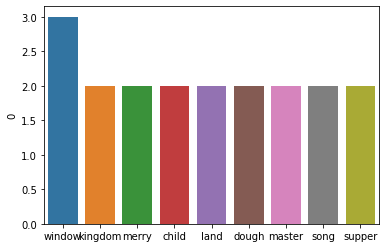

In [87]:
sns.barplot(x=lst1.iloc[1:10,0].index,y=lst1.iloc[1:10,0])

### Word Cloud

In [92]:
!pip install wordcloud


  Using cached https://files.pythonhosted.org/packages/56/ff/2b242a0e40036a310f2cf4310cff5e8d3df92656f1ab1f450fbb76b74237/wordcloud-1.8.1-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3a/5f/47e578b3ae79e2624e205445ab77a1848acdaa2929a00eeef6b16eaaeb20/numpy-1.16.6-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/12/ad/61f8dfba88c4e56196bf6d056cdbba64dc9c5dfdfbc97d02e6472feed913/Pillow-6.2.2-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/9d/40/5ba7d4a3f80d39d409f21899972596bf62c8606f1406a825029649eaa439/matplotlib-2.2.5-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/da/d1/080d2bb13773803648281a49e3918f65b31b7beebf009887a529357fd44a/backports.functools_lru_cache-1.6.1-py

In [93]:
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [57]:
wc = WordCloud(width=800, height=800, background_color='white', max_words=150)
wc.generate_from_frequencies(bow)

In [58]:
import matplotlib.pyplot as plt 

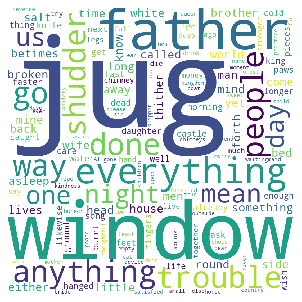

In [59]:
plt.imshow(wc)
#fig = plt.figure(figsize=(10,12))
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Preparing the dataset for analysis
 
For analysis of the data, we have to prepare the text dataset. For this, we first have to generate a list of the most common words used over all the text. We use Bag-of-Words (BOW) for this. After we have the final list of the words, we create for each movie review the count of such words. The final dataset will be generated by creating a dataframe where the rows are the movies and the columns are the word's count.

In [94]:
df = pd.read_csv("../data/grimm-tales.tab", sep="\t")
df.head()

,ATU Topic,Title,Abstract,Content,ATU Numerical,ATU Type
0,discrete,string,string,string,string,discrete
1,class,NaN,NaN,include=True,NaN,meta
2,Tales of Magic,A Tale About the Boy Who Went Forth to Learn W...,A simple boy who just wants to be frightened.,"A certain father had two sons, the elder of wh...",326.0,Supernatural Adversaries
3,Tales of Magic,Brier Rose,An offended witch curses a young princess to d...,A king and queen once upon a time reigned in a...,410.0,Supernatural or Enchanted Relatives
4,Animal Tales,Cat and Mouse in Partnership,"A mouse lives with a cat, and the cat eats all...",A certain cat had made the acquaintance of a m...,15.0,Wild Animals


In [95]:
### the first two rows are descriptive of the data, we have to delete them
df = df[2:len(df)]
### select only the animals and magic tales
df = df.loc[(df['ATU Topic']=='Animal Tales') | (df['ATU Topic']=='Tales of Magic')]

In [96]:
df.shape

(44, 6)

In [101]:
################
### Data Cleansing
################
wrds = []
n = df.shape[0]
dftext = {}
df = df.reset_index()

for i in range(0,n):
    id = df.index[i]
    ### Preprocessing
    text = df.loc[i,'Content']
    ### Lowcase
    text = text.lower()
    ### tokenizing
    tokenized_word=word_tokenize(text)
    ### remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokenized_word]
    ### remove stopwords
    stop_words=set(stopwords.words("english"))
    filtered_sent=[]
    for w in stripped:
        if w not in stop_words:
            filtered_sent.append(w)
    ### remove other stopwords
    newpunct = ['','‘', '’', '“', '”','two','one']
    refiltered_sent=[]
    for w in filtered_sent:
        if w not in newpunct:
            refiltered_sent.append(w)
    ### Lemmatization¶
    lem = WordNetLemmatizer()
    #lem.lemmatize(filtered_sent,"v")
    lem_strings=[]
    for w in refiltered_sent:
        lem.lemmatize(w,"v")
        lem_strings.append(w)
    ### stemming
    #stem = PorterStemmer()
    #stem.stem(filtered_sent)
    bow = Counter(lem_strings)
    #print(movie,i,bow)
    #bow.most_common(20)
    bowlst = list(bow.keys())#.remove('')
    wrds.append(bowlst)
    dftext[id] = dict(bow)
    

In [102]:
#!pip install itertools
import itertools
wrds_joined = list(itertools.chain.from_iterable(wrds))
print('total: ',len(wrds_joined))
print('unique: ',len(set(wrds_joined)))

total:  13460
unique:  3778


In [103]:
### get the unique words as base
wrds_unique = list(set(wrds_joined))

In [104]:
dftext

{0: {'certain': 1,
  'father': 18,
  'sons': 1,
  'elder': 3,
  'smart': 1,
  'sensible': 1,
  'could': 21,
  'everything': 2,
  'younger': 3,
  'stupid': 2,
  'neither': 2,
  'learn': 18,
  'understand': 4,
  'anything': 4,
  'people': 2,
  'saw': 5,
  'said': 52,
  'fellow': 4,
  'give': 3,
  'trouble': 2,
  'done': 3,
  'always': 4,
  'forced': 1,
  'bade': 2,
  'fetch': 1,
  'late': 2,
  'nighttime': 1,
  'way': 6,
  'led': 3,
  'churchyard': 1,
  'dismal': 1,
  'place': 4,
  'answered': 9,
  'oh': 4,
  'go': 14,
  'makes': 6,
  'shudder': 34,
  'afraid': 1,
  'stories': 1,
  'told': 4,
  'fire': 20,
  'night': 10,
  'made': 5,
  'flesh': 1,
  'creep': 1,
  'listeners': 1,
  'sometimes': 1,
  'us': 1,
  'sat': 9,
  'corner': 7,
  'listened': 1,
  'rest': 2,
  'imagine': 1,
  'mean': 2,
  'saying': 3,
  'make': 2,
  'thought': 8,
  'must': 8,
  'art': 2,
  'nothing': 5,
  'came': 16,
  'pass': 3,
  'day': 7,
  'hearken': 1,
  'growing': 1,
  'tall': 2,
  'strong': 2,
  'something': 

Now that we have the list of unique words and the word count for each movie, we proceed to generate the final dataset for analysis...


In [105]:
text_ff = pd.DataFrame(dftext)
text_ff.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
certain,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
father,18.0,NaN,NaN,11.0,12.0,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,11.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
sons,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
elder,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
smart,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
text_ff = text_ff.transpose()
text_ff.head()

,certain,father,sons,elder,smart,sensible,could,everything,younger,stupid,...,struggling,gorged,suffered,embraced,speed,rattled,rumbles,tumbles,twas,feels
0,1.0,18.0,1.0,3.0,1.0,1.0,21.0,2.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,NaN,6.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,11.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,12.0,NaN,NaN,NaN,NaN,5.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
### substitute NaNs with zero
text_ff = text_ff.fillna(0)
text_ff.head()

,certain,father,sons,elder,smart,sensible,could,everything,younger,stupid,...,struggling,gorged,suffered,embraced,speed,rattled,rumbles,tumbles,twas,feels
0,1.0,18.0,1.0,3.0,1.0,1.0,21.0,2.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,6.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,11.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,12.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
text_ff['label'] = df['ATU Topic']

In [109]:
text_ff.to_pickle("../data/grimm_tales_ff.pckl")

In [110]:
text_ff.shape

(44, 3779)